In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kruskal
import scikit_posthocs as sp

%load_ext autoreload
%autoreload 2



file_name = 'ridehailing.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = pd.read_csv(file_name)
df = df.dropna(subset="Steps") # drop passenger agents

In [33]:
steps = df[df["Step"] == 1440]
display(steps)

,RunId,iteration,Step,num_drivers,size,waiting_time,multi_pass,seed_int,rate,total_steps,strategy,Manhattan,AgentID,Steps,IdleTime,sec_id,request_time,pickup_time,dropoff_time
5601,2,0,1440,1,15,NaN,False,11,10,1440,StepType.QUEUE,0,2,1292.0,12.0,NaN,NaN,NaN,NaN
10912,8,0,1440,1,15,NaN,False,111,10,1440,StepType.QUEUE,0,2,1262.0,40.0,NaN,NaN,NaN,NaN
16186,9,0,1440,1,15,NaN,False,121,10,1440,StepType.CLOSEST,0,2,1292.0,13.0,NaN,NaN,NaN,NaN
21579,10,0,1440,1,15,NaN,False,121,10,1440,StepType.WAITING,0,2,1279.0,23.0,NaN,NaN,NaN,NaN
27077,1,0,1440,1,15,NaN,False,11,10,1440,StepType.WAITING,0,2,1274.0,32.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832194,749,4,1440,5,15,NaN,False,578,10,1440,StepType.QUEUE,0,6,556.0,828.0,NaN,NaN,NaN,NaN
5832195,749,4,1440,5,15,NaN,False,578,10,1440,StepType.QUEUE,0,7,635.0,738.0,NaN,NaN,NaN,NaN
5832196,749,4,1440,5,15,NaN,False,578,10,1440,StepType.QUEUE,0,8,505.0,882.0,NaN,NaN,NaN,NaN
5832197,749,4,1440,5,15,NaN,False,578,10,1440,StepType.QUEUE,0,9,521.0,858.0,NaN,NaN,NaN,NaN


In [15]:
groups = steps.groupby(["num_drivers", "strategy", "AgentID"])
steps_av = groups.mean()

agent_groups = steps_av.groupby(["num_drivers", "strategy"])
total_sum = agent_groups.sum()
display(total_sum)

RunId  iteration    Step  size  waiting_time  \
num_drivers strategy                                                          
1           StepType.CLOSEST   313.5        2.0  1440.0  15.0           0.0   
            StepType.QUEUE     315.5        2.0  1440.0  15.0           0.0   
            StepType.WAITING   314.5        2.0  1440.0  15.0           0.0   
2           StepType.CLOSEST   687.0        4.0  2880.0  30.0           0.0   
            StepType.QUEUE     691.0        4.0  2880.0  30.0           0.0   
            StepType.WAITING   689.0        4.0  2880.0  30.0           0.0   
3           StepType.CLOSEST  1120.5        6.0  4320.0  45.0           0.0   
            StepType.QUEUE    1126.5        6.0  4320.0  45.0           0.0   
            StepType.WAITING  1123.5        6.0  4320.0  45.0           0.0   
4           StepType.CLOSEST  1614.0        8.0  5760.0  60.0           0.0   
            StepType.QUEUE    1622.0        8.0  5760.0  60.0           0.0   
            StepType.WAITING  1618.0        8.0  5760.0  60.0           0.0   
5           StepType.CLOSEST  2167.5       10.0  7200.0  75.0           0.0   
            StepType.QUEUE    2177.5       10.0  7200.0  75.0           0.0   
            StepType.WAITING  2172.5       10.0  7200.0  75.0           0.0   

                              multi_pass  seed_int  rate  total_steps  \
num_drivers strategy                                                    
1           StepType.CLOSEST         0.0     225.2  10.0       1440.0   
            StepType.QUEUE           0.0     225.2  10.0       1440.0   
            StepType.WAITING         0.0     225.2  10.0       1440.0   
2           StepType.CLOSEST         0.0     450.4  20.0       2880.0   
            StepType.QUEUE           0.0     450.4  20.0       2880.0   
            StepType.WAITING         0.0     450.4  20.0       2880.0   
3           StepType.CLOSEST         0.0     675.6  30.0       4320.0   
            StepType.QUEUE           0.0     675.6  30.0       4320.0   
            StepType.WAITING         0.0     675.6  30.0       4320.0   
4           StepType.CLOSEST         0.0     900.8  40.0       5760.0   
            StepType.QUEUE           0.0     900.8  40.0       5760.0   
            StepType.WAITING         0.0     900.8  40.0       5760.0   
5           StepType.CLOSEST         0.0    1126.0  50.0       7200.0   
            StepType.QUEUE           0.0    1126.0  50.0       7200.0   
            StepType.WAITING         0.0    1126.0  50.0       7200.0   

                              Manhattan    Steps  IdleTime  sec_id  \
num_drivers strategy                                                 
1           StepType.CLOSEST        0.0  1263.98     31.50     0.0   
            StepType.QUEUE          0.0  1274.72     26.80     0.0   
            StepType.WAITING        0.0  1232.82     25.18     0.0   
2           StepType.CLOSEST        0.0  2280.12    354.96     0.0   
            StepType.QUEUE          0.0  2304.82    331.80     0.0   
            StepType.WAITING        0.0  2285.96    326.80     0.0   
3           StepType.CLOSEST        0.0  2572.24   1476.34     0.0   
            StepType.QUEUE          0.0  2595.80   1450.60     0.0   
            StepType.WAITING        0.0  2587.04   1460.76     0.0   
4           StepType.CLOSEST        0.0  2618.00   2864.66     0.0   
            StepType.QUEUE          0.0  2637.90   2844.22     0.0   
            StepType.WAITING        0.0  2638.52   2843.78     0.0   
5           StepType.CLOSEST        0.0  2647.92   4270.78     0.0   
            StepType.QUEUE          0.0  2657.36   4261.64     0.0   
            StepType.WAITING        0.0  2643.62   4276.26     0.0   

                              request_time  pickup_time  dropoff_time  
num_drivers strategy                                                   
1           StepType.CLOSEST           0.0          0.0           0.0  
            StepType.QUEUE            

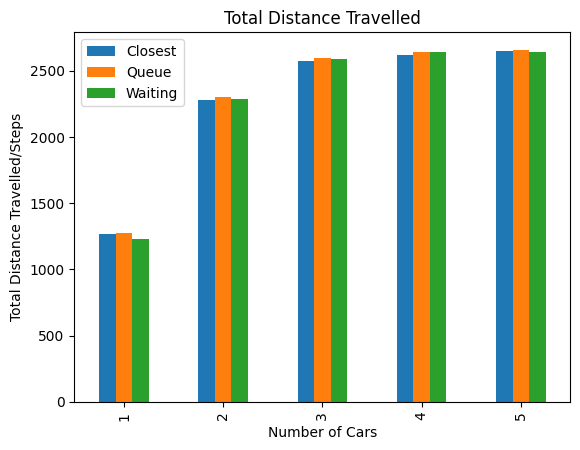

In [20]:
unstacked = total_sum.unstack()


ax = unstacked["Steps"].plot(kind="bar", stacked=False)
ax.legend(['Closest', 'Queue', "Waiting"])


plt.xlabel('Number of Cars')
plt.ylabel('Total Distance Travelled/Steps')
plt.title('Total Distance Travelled')
plt.savefig('figures/total_steps.png')


## Stats Testing

In [47]:
norm = pd.DataFrame(columns=['Strategy', 'num_drivers', 'Iteration', 'Seed_int', 'steps'])

for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
    for i in range(1,6):
        for seed_int in steps['seed_int'].unique():
            for iteration in steps['iteration'].unique():
                distance = steps[(steps["strategy"] == strategy) & (steps["num_drivers"] == i) & (steps['seed_int'] == seed_int) & (steps['iteration'] == iteration)]
                # print(distance['Steps'])
                total_steps = distance['Steps'].sum()
                # print(total_steps)
                
                norm.loc[len(norm)] = {'Strategy': strategy, 'num_drivers': i, 'Iteration': iteration, 'Seed_int': seed_int, 'steps': total_steps}



norm
# unique_fulfilled

,Strategy,num_drivers,Iteration,Seed_int,steps
0,StepType.CLOSEST,1,0,11,1234.0
1,StepType.CLOSEST,1,1,11,1276.0
2,StepType.CLOSEST,1,2,11,1252.0
3,StepType.CLOSEST,1,3,11,1278.0
4,StepType.CLOSEST,1,4,11,1239.0
...,...,...,...,...,...
745,StepType.WAITING,5,0,578,2634.0
746,StepType.WAITING,5,1,578,2542.0
747,StepType.WAITING,5,2,578,2649.0
748,StepType.WAITING,5,3,578,2724.0


In [48]:
for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
    for i in range(1,6):
        group = norm[(norm["Strategy"] == strategy) & (norm["num_drivers"] == i)]

        
        stat, p = shapiro(group["steps"])

        # Print the test statistic and p-value
        print("Shapiro-Wilk test statistic:", stat)
        print("p-value:", p)
        if p < 0.05:
            print("Reject", strategy, i)

Shapiro-Wilk test statistic: 0.9860804080963135
p-value: 0.8168864250183105
Shapiro-Wilk test statistic: 0.9873080253601074
p-value: 0.8644347190856934
Shapiro-Wilk test statistic: 0.9687865376472473
p-value: 0.20649398863315582
Shapiro-Wilk test statistic: 0.9590786695480347
p-value: 0.08133215457201004
Shapiro-Wilk test statistic: 0.9787458181381226
p-value: 0.5003643035888672
Shapiro-Wilk test statistic: 0.9826871752738953
p-value: 0.6694272756576538
Shapiro-Wilk test statistic: 0.9851562976837158
p-value: 0.7783056497573853
Shapiro-Wilk test statistic: 0.9657092094421387
p-value: 0.15406011044979095
Shapiro-Wilk test statistic: 0.9550908803939819
p-value: 0.05541413277387619
Shapiro-Wilk test statistic: 0.9261669516563416
p-value: 0.003968342207372189
Reject StepType.QUEUE 5
Shapiro-Wilk test statistic: 0.3847476840019226
p-value: 3.578256126731544e-13
Reject StepType.WAITING 1
Shapiro-Wilk test statistic: 0.5964099764823914
p-value: 1.7233665883242821e-10
Reject StepType.WAITING 2

In [49]:
# not normal, so use kruskal 

for i in range(1,6):
    group1 = norm[(norm["Strategy"] == "StepType.CLOSEST") & (norm["num_drivers"] == i)]['steps']
    group2 = norm[(norm["Strategy"] == "StepType.QUEUE") & (norm["num_drivers"] == i)]['steps']
    group3 = norm[(norm["Strategy"] == "StepType.WAITING") & (norm["num_drivers"] == i)]['steps']

    stat, p = kruskal(group1, group2, group3)

    print('Statistics=%.3f, p=%f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Samples look to be drawn from the same distributions (fail to reject H0)')
    else:
        print('Samples look to be drawn from different distributions (reject H0)')

Statistics=11.833, p=0.002695
Samples look to be drawn from different distributions (reject H0)
Statistics=4.881, p=0.087129
Samples look to be drawn from the same distributions (fail to reject H0)
Statistics=1.538, p=0.463490
Samples look to be drawn from the same distributions (fail to reject H0)
Statistics=2.399, p=0.301317
Samples look to be drawn from the same distributions (fail to reject H0)
Statistics=0.197, p=0.906005
Samples look to be drawn from the same distributions (fail to reject H0)


In [50]:
# posthoc analysus - pairwise t test use dunns test for non-parametric data
data = norm[(norm["num_drivers"] == 1)]



p_values= sp.posthoc_dunn(data,val_col='steps', group_col='Strategy', p_adjust = 'bonferroni')
 
print(p_values)


# # perform post-hoc Dunn's test with Bonferroni correction
# groups = np.concatenate((np.repeat('group1', 20), np.repeat('group2', 20), np.repeat('group3', 20)))
# data = pd.DataFrame({'value': np.concatenate((group1, group2, group3)), 'group': groups})

# dunn_results = posthoc_dunn(data, val_col='value', group_col='group', p_adjust='bonferroni')
# print(dunn_results).


                  StepType.CLOSEST  StepType.QUEUE  StepType.WAITING
StepType.CLOSEST          1.000000        0.001883          0.125749
StepType.QUEUE            0.001883        1.000000          0.498143
StepType.WAITING          0.125749        0.498143          1.000000
